Problem Statement:


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.



To download the dataset, use the link given below. 

Downlaod Files:
https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
df.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [5]:
df.sample()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
15748,49,Federal-gov,128990,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,>50K


Data Descriptive Analysis

In [6]:
df.shape

(32560, 15)

In [7]:
#data types
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [8]:
#data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
#Checking data description for all numerical columns
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [10]:
#Checking data description for all non-numerical columns. 
#Assigning all non numeric columns to bdmtrain_non

df_str=df[['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income']]

df_str.describe()

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
count,32560,32560,32560,32560,32560,32560,32560,32560,32560
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27815,21789,29169,24719


In [11]:
#Checking the columns
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [12]:
#checking for null values whcihwe saw in information
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [13]:
#Checking the content of each  columns
df.Age.value_counts()

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64

In [14]:

df.Workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [15]:
df.Education.value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

In [16]:
df.Fnlwgt.value_counts()

164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64

In [17]:
df.Education_num.value_counts()

9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: Education_num, dtype: int64

In [18]:
df.Marital_status.value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

In [19]:
df.Occupation.value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [20]:
df.Relationship.value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

In [21]:
df.Race.value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

In [22]:
df.Sex.value_counts()

 Male      21789
 Female    10771
Name: Sex, dtype: int64

In [23]:
df.Capital_gain.value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: Capital_gain, Length: 119, dtype: int64

In [24]:
df.Capital_loss.value_counts()

0       31041
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: Capital_loss, Length: 92, dtype: int64

In [25]:
df.Hours_per_week.value_counts()

40    15216
50     2819
45     1824
60     1475
35     1297
      ...  
82        1
94        1
92        1
74        1
87        1
Name: Hours_per_week, Length: 94, dtype: int64

In [26]:
df.Native_country.value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [27]:
df.shape

(32560, 15)

In [28]:
df.Income.value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

Observations:
    
    The Dataset is made up of;
        32560 rows and 15 columns
        14 features and 1 Target
        columns has ? which we will treat with Encoding technique.
   
    Age:
        
    - It is made up of integer data
    - It has 73 factors
    - It has no null values
    - Its Datatype is an int type
    
    
    Workclass:
        
    - It is made up of Categorical data
    - It has 8 factors; Private(22696), Self-emp-not-inc(2541), Local-gov(2093), State-gov(1297),           Self-emp-inc(1116), Federal-gov(960),Without-pay(14),Never-worked (7)
    - It has 1836 null values.
    - Its Datatype is an Object type
    
    Education:
    - It is made up of Categorical data
    - It has 16 factors; 
    - It has no null values
    - Its Datatype is an Object type
    
    Fnlwgt:
    - It is made up of integer data
    - It has no null values
    - Its Datatype is an int type
    
    Education_num:
    - It is made up of integer data
    - It has no null values
    - Its Datatype is an int type
    
    Marital_status:
    - It is made up of Categorical data
    - It has 7 factors; 
    - It has no null values
    - Its Datatype is an Object type
    
    Occupation:
    - It is made up of Categorical data
    - It has 14 factors; 
    - It has 1843 null values.
    - Its Datatype is an Object type
    
    Relationship:
    - It is made up of Categorical data
    - It has 6 factors; 
    - It has  no null values
    - Its Datatype is an Object type
    
    Race:
    - It is made up of Categorical data
    - It has 5 factors; 
    - It has  no null values
    - Its Datatype is an Object type
    
     Sex:
    - It is made up of Categorical data
    - It has 2 factors; 
    - It has  no null values
    - Its Datatype is an Object type
    
    Capital_gain:
    - It is made up of int data
    - It has many factors; 
    - It has  no null values
    - Its Datatype is an int type
    
    Capital_loss:
    - It is made up of int data
    - It has many factors; 
    - It has  no null values
    - Its Datatype is an int type
    
    Hours_per_week:
    - It is made up of int data
    - It has many factors; 
    - It has  no null values
    - Its Datatype is an int type
    
    Native_country:
    - It is made up of Catogorical data
    - It has 41 factors; 
    - It has  583 null values.
    - Its Datatype is an object type  
     
    Income(Target):
        
    - It is made up of Catogorical data
    - It has 2 factors; 
    - It has no null values
    - Its Datatype is an object type  
     

EXPLORATORY DATA ANALYSIS(EDA) AND VISUALIZATION

Count Distribution of Categorical Data - Univariate Analysis

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, ' Self-emp-not-inc'),
  Text(1, 0, ' Private'),
  Text(2, 0, ' State-gov'),
  Text(3, 0, ' Federal-gov'),
  Text(4, 0, ' Local-gov'),
  Text(5, 0, ' ?'),
  Text(6, 0, ' Self-emp-inc'),
  Text(7, 0, ' Without-pay'),
  Text(8, 0, ' Never-worked')])

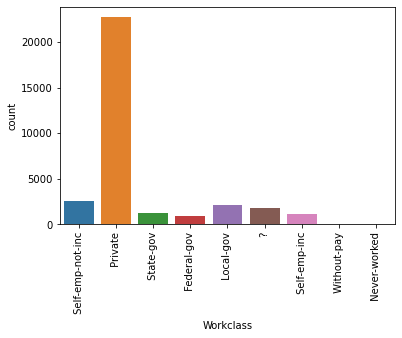

In [30]:
sns.countplot(x= 'Workclass', data=df)
print(df.Workclass.value_counts())
plt.xticks(rotation=90)

Observation:
    Majority of the people are workign in  private.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, ' Bachelors'),
  Text(1, 0, ' HS-grad'),
  Text(2, 0, ' 11th'),
  Text(3, 0, ' Masters'),
  Text(4, 0, ' 9th'),
  Text(5, 0, ' Some-college'),
  Text(6, 0, ' Assoc-acdm'),
  Text(7, 0, ' Assoc-voc'),
  Text(8, 0, ' 7th-8th'),
  Text(9, 0, ' Doctorate'),
  Text(10, 0, ' Prof-school'),
  Text(11, 0, ' 5th-6th'),
  Text(12, 0, ' 10th'),
  Text(13, 0, ' 1st-4th'),
  Text(14, 0, ' Preschool'),
  Text(15, 0, ' 12th')])

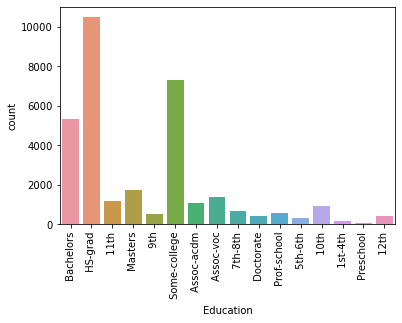

In [31]:
sns.countplot(x='Education', data =df)
plt.xticks(rotation=90)

Observation: 
    Most of the peoiple in teh dataset ae HS-grad, followed by Some-college & Bachelors.

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, ' Married-civ-spouse'),
  Text(1, 0, ' Divorced'),
  Text(2, 0, ' Married-spouse-absent'),
  Text(3, 0, ' Never-married'),
  Text(4, 0, ' Separated'),
  Text(5, 0, ' Married-AF-spouse'),
  Text(6, 0, ' Widowed')])

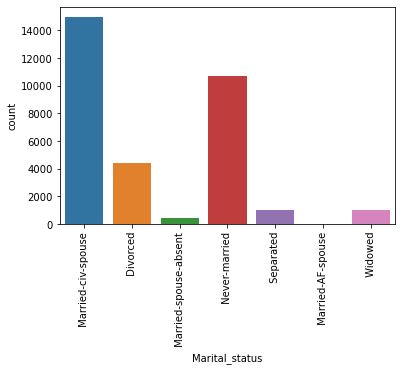

In [32]:
sns.countplot(x='Marital_status', data = df)
plt.xticks(rotation=90)

Observation:
    Most of the people are falling in Married-civ-spouse follwoed by Never-married.

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64


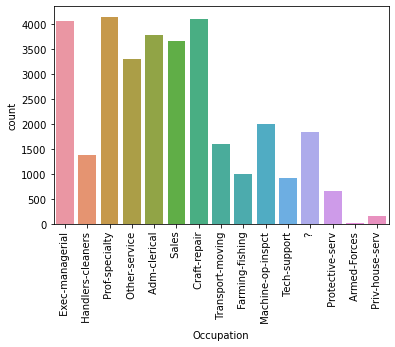

In [33]:
sns.countplot(x= 'Occupation', data=df)
plt.xticks(rotation=90)
print(df.Occupation.value_counts())

Observation:
    Most of the peopel where working in Prof-specialty, followed by Craft-repair and Exec-managerial.

<AxesSubplot:xlabel='Relationship', ylabel='count'>

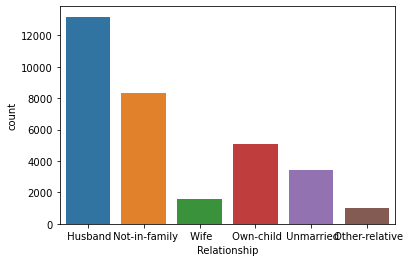

In [34]:
sns.countplot(x='Relationship', data =df)

(array([0, 1, 2, 3, 4]), [Text(0, 0, ' White'), Text(1, 0, ' Black'), Text(2, 0, ' Asian-Pac-Islander'), Text(3, 0, ' Amer-Indian-Eskimo'), Text(4, 0, ' Other')])


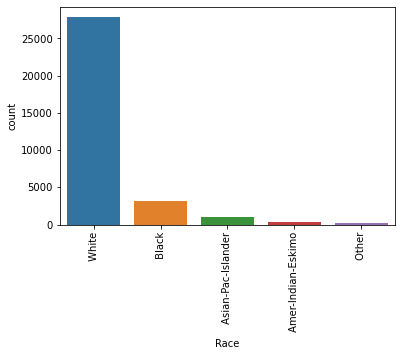

In [35]:
sns.countplot(x='Race', data =df)
print(plt.xticks(rotation=90))

Observations: 
    Most of the people in the dataset are whites.

<AxesSubplot:xlabel='Sex', ylabel='count'>

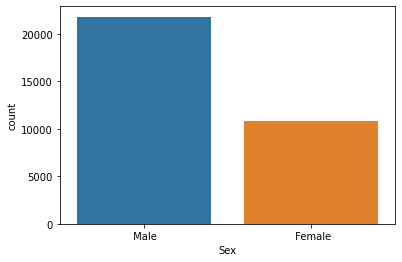

In [36]:
sns.countplot(x='Sex', data=df)

Observations:
    Majority are males in the dataset.

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, ' United-States'),
  Text(1, 0, ' Cuba'),
  Text(2, 0, ' Jamaica'),
  Text(3, 0, ' India'),
  Text(4, 0, ' ?'),
  Text(5, 0, ' Mexico'),
  Text(6, 0, ' South'),
  Text(7, 0, ' Puerto-Rico'),
  Text(8, 0, ' Honduras'),
  Text(9, 0, ' England'),
  Text(10, 0, ' Canada'),
  Text(11, 0, ' Germany'),
  Text(12, 0, ' Iran'),
  Text(13, 0, ' Philippines'),
  Text(14, 0, ' Italy'),
  Text(15, 0, ' Poland'),
  Text(16, 0, ' Columbia'),
  Text(17, 0, ' Cambodia'),
  Text(18, 0, ' Thailand'),
  Text(19, 0, ' Ecuador'),
  Text(20, 0, ' Laos'),
  Text(21, 0, ' Taiwan'),
  Text(22, 0, ' Haiti'),
  Text(23, 0, ' Portugal'),
  Text(24, 0, ' Dominican-Republic'),
  Text(25, 0, ' El-Salvador'),
  Text(26, 0, ' France'),
  Text(27, 0, ' Guatemala'),
  Text(28, 0, ' China'),
  Text(29, 0, ' Japan'),
  

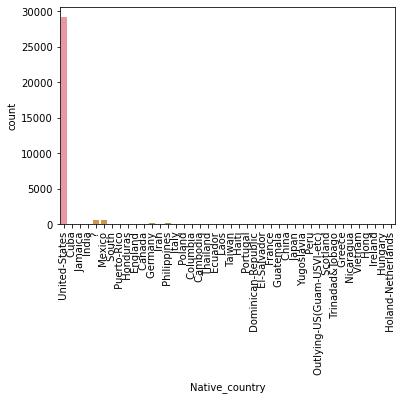

In [37]:
sns.countplot(x='Native_country', data =df)
print(df.Native_country.value_counts())
plt.xticks(rotation=90)

Obseravtion: Maximum people are from United States.

<AxesSubplot:xlabel='Age', ylabel='Income'>

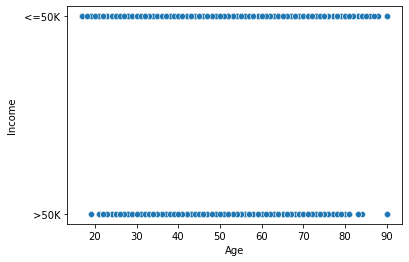

In [38]:
sns.scatterplot(x= 'Age',y='Income', data = df)

<AxesSubplot:xlabel='Fnlwgt', ylabel='Income'>

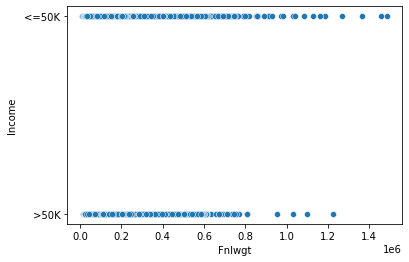

In [39]:
sns.scatterplot(x='Fnlwgt', y = 'Income', data =df)

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

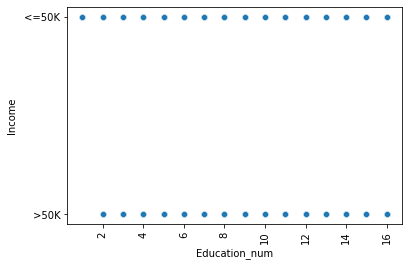

In [40]:
sns.scatterplot(x= 'Education_num', y='Income', data =df)
plt.xticks(rotation=90)

<AxesSubplot:xlabel='Age', ylabel='Density'>

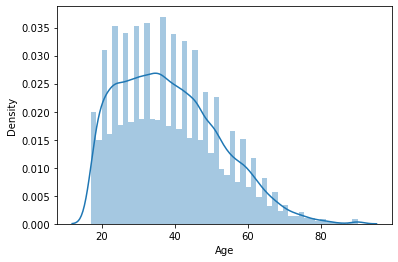

In [41]:
sns.distplot(df['Age'],kde=True)

Observation: The age variable is slighlty right-skewed

<AxesSubplot:xlabel='Fnlwgt', ylabel='Density'>

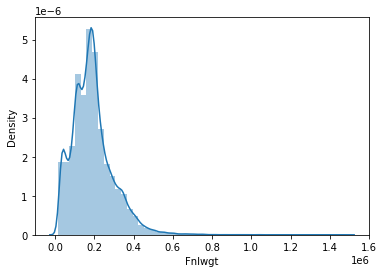

In [42]:
sns.distplot(df['Fnlwgt'],kde=True)

<AxesSubplot:xlabel='Education_num', ylabel='Density'>

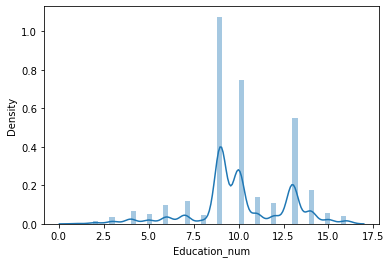

In [43]:
sns.distplot(df['Education_num'],kde=True)

<AxesSubplot:xlabel='Capital_gain', ylabel='Density'>

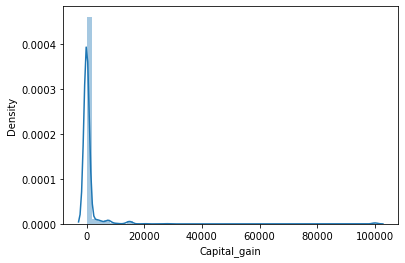

In [44]:
sns.distplot(df['Capital_gain'],kde=True)

<AxesSubplot:xlabel='Capital_loss', ylabel='Density'>

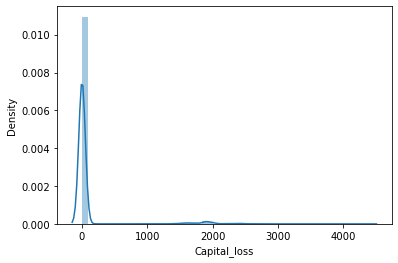

In [45]:
sns.distplot(df['Capital_loss'],kde=True)

<AxesSubplot:xlabel='Hours_per_week', ylabel='Density'>

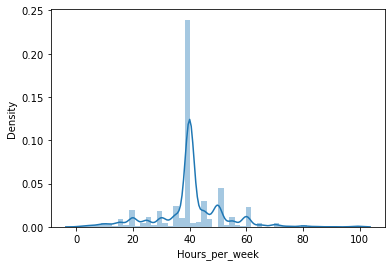

In [46]:
sns.distplot(df['Hours_per_week'],kde=True)

Observations: Most of the numeric columns donot follow a normal distribution.

In [47]:
#we can see if we need to delete one of this column as both are givng the same information
df.iloc[:,3:5]

,Education,Education_num
0,Bachelors,13
1,HS-grad,9
2,11th,7
3,Bachelors,13
4,Masters,14
...,...,...
32555,Assoc-acdm,12
32556,HS-grad,9
32557,HS-grad,9
32558,HS-grad,9


Encoding

- We cannot perform Exploratory Data Analysis on Non-numerical Data, so we have to first of all convert them to numerical data
- Here we shall adopt Ordinal & Label Encoder to transform the all Non-numerical column into Numerical Data!

In [48]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

In [49]:
le=LabelEncoder()
oe=OrdinalEncoder()

In [50]:
df['Workclass']=oe.fit_transform(df['Workclass'].values.reshape(-1,1))
df['Education']=oe.fit_transform(df['Education'].values.reshape(-1,1))
df['Marital_status']=oe.fit_transform(df['Marital_status'].values.reshape(-1,1))
df['Occupation']=oe.fit_transform(df['Occupation'].values.reshape(-1,1))
df['Relationship']=oe.fit_transform(df['Relationship'].values.reshape(-1,1))
df['Race']=oe.fit_transform(df['Race'].values.reshape(-1,1))
df['Sex']=le.fit_transform(df['Sex'].values.reshape(-1,1))
df['Native_country']=oe.fit_transform(df['Native_country'].values.reshape(-1,1))
df['Income']=oe.fit_transform(df['Income'].values.reshape(-1,1))

In [51]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6.0,83311,9.0,13,2.0,4.0,0.0,4.0,1,0,0,13,39.0,0.0
1,38,4.0,215646,11.0,9,0.0,6.0,1.0,4.0,1,0,0,40,39.0,0.0
2,53,4.0,234721,1.0,7,2.0,6.0,0.0,2.0,1,0,0,40,39.0,0.0
3,28,4.0,338409,9.0,13,2.0,10.0,5.0,2.0,0,0,0,40,5.0,0.0
4,37,4.0,284582,12.0,14,2.0,4.0,5.0,4.0,0,0,0,40,39.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4.0,257302,7.0,12,2.0,13.0,5.0,4.0,0,0,0,38,39.0,0.0
32556,40,4.0,154374,11.0,9,2.0,7.0,0.0,4.0,1,0,0,40,39.0,1.0
32557,58,4.0,151910,11.0,9,6.0,1.0,4.0,4.0,0,0,0,40,39.0,0.0
32558,22,4.0,201490,11.0,9,4.0,1.0,3.0,4.0,1,0,0,20,39.0,0.0


In [52]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6.0,83311,9.0,13,2.0,4.0,0.0,4.0,1,0,0,13,39.0,0.0
1,38,4.0,215646,11.0,9,0.0,6.0,1.0,4.0,1,0,0,40,39.0,0.0
2,53,4.0,234721,1.0,7,2.0,6.0,0.0,2.0,1,0,0,40,39.0,0.0
3,28,4.0,338409,9.0,13,2.0,10.0,5.0,2.0,0,0,0,40,5.0,0.0
4,37,4.0,284582,12.0,14,2.0,4.0,5.0,4.0,0,0,0,40,39.0,0.0


In [53]:
df.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,4.0,257302,7.0,12,2.0,13.0,5.0,4.0,0,0,0,38,39.0,0.0
32556,40,4.0,154374,11.0,9,2.0,7.0,0.0,4.0,1,0,0,40,39.0,1.0
32557,58,4.0,151910,11.0,9,6.0,1.0,4.0,4.0,0,0,0,40,39.0,0.0
32558,22,4.0,201490,11.0,9,4.0,1.0,3.0,4.0,1,0,0,20,39.0,0.0
32559,52,5.0,287927,11.0,9,2.0,4.0,5.0,4.0,0,15024,0,40,39.0,1.0


In [54]:
df.sample(2)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
28822,40,4.0,193494,11.0,9,2.0,6.0,0.0,4.0,1,0,0,46,39.0,0.0
5637,25,4.0,190107,9.0,13,4.0,3.0,3.0,4.0,1,0,0,40,39.0,0.0


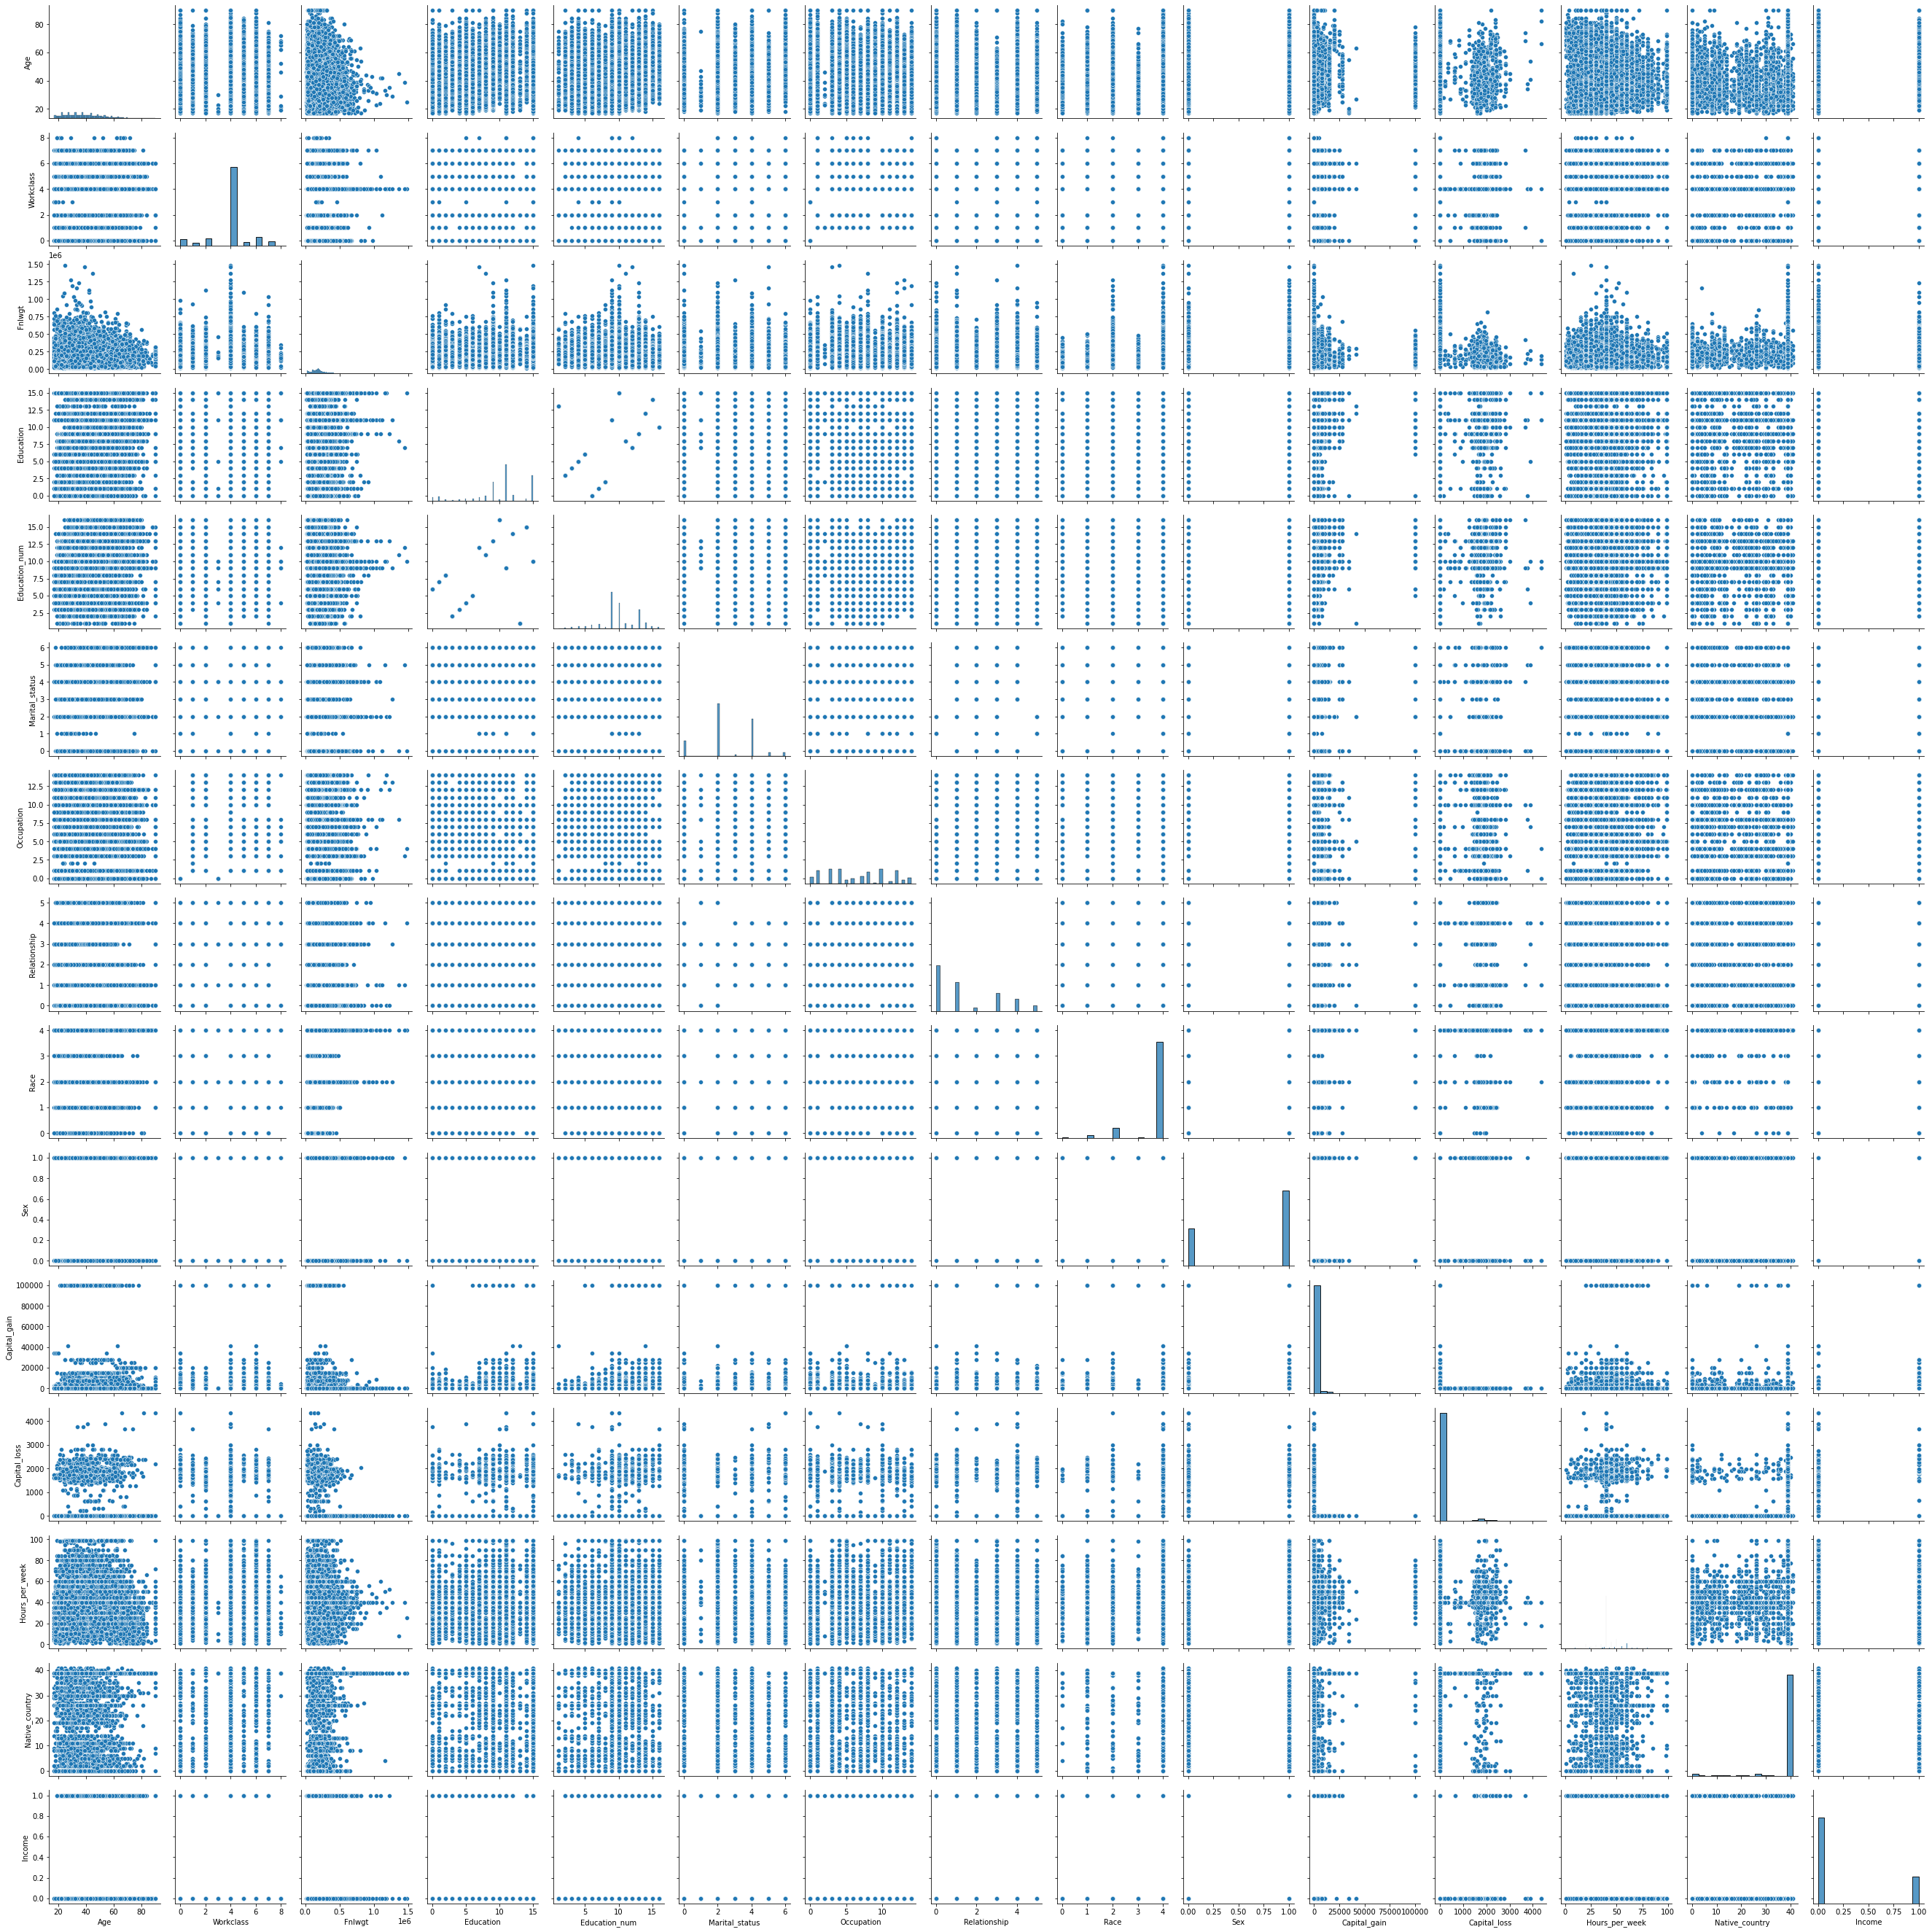

In [55]:
sns.pairplot(df)

Observation: There does not seem to have any correlation between the various columns.

Correlation Check(Collinearity and Multicollinearity)- Multivariate Analysis

Collinearity Between Feature and Label
 - Multicolinearity between features

Lets see/visualize the correlation between (Features vs Label) and (Features vs Features)

In [56]:
#checking for general correlation
df.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.003786,-0.076646,-0.010508,0.036527,-0.266292,-0.020946,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.001151,0.234039
Workclass,0.003786,1.000000,-0.016587,0.023537,0.052015,-0.064798,0.255004,-0.090449,0.049720,0.095942,0.033828,0.012231,0.138974,-0.007710,0.051645
Fnlwgt,-0.076646,-0.016587,1.000000,-0.028156,-0.043159,0.028184,0.001554,0.008922,-0.021278,0.026882,0.000437,-0.010259,-0.018770,-0.051957,-0.009481
Education,-0.010508,0.023537,-0.028156,1.000000,0.359172,-0.038398,-0.021274,-0.010879,0.014135,-0.027349,0.030047,0.016744,0.055510,0.064291,0.079311
Education_num,0.036527,0.052015,-0.043159,0.359172,1.000000,-0.069338,0.109748,-0.094145,0.031825,0.012256,0.122627,0.079932,0.148127,0.050831,0.335182
Marital_status,-0.266292,-0.064798,0.028184,-0.038398,-0.069338,1.000000,-0.009617,0.185461,-0.068025,-0.129337,-0.043398,-0.034182,-0.190521,-0.023827,-0.199295
Occupation,-0.020946,0.255004,0.001554,-0.021274,0.109748,-0.009617,1.000000,-0.075620,0.006779,0.080328,0.025511,0.017979,0.080384,-0.012532,0.075448
Relationship,-0.263698,-0.090449,0.008922,-0.010879,-0.094145,0.185461,-0.075620,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.005504,-0.250924
Race,0.028718,0.049720,-0.021278,0.014135,0.031825,-0.068025,0.006779,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.137849,0.071853
Sex,0.088832,0.095942,0.026882,-0.027349,0.012256,-0.129337,0.080328,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,-0.008125,0.215995


In [57]:
#checking for correlation between each feature and Label
df.corr()['Income'].sort_values()

Relationship     -0.250924
Marital_status   -0.199295
Fnlwgt           -0.009481
Native_country    0.015845
Workclass         0.051645
Race              0.071853
Occupation        0.075448
Education         0.079311
Capital_loss      0.150523
Sex               0.215995
Capital_gain      0.223333
Hours_per_week    0.229690
Age               0.234039
Education_num     0.335182
Income            1.000000
Name: Income, dtype: float64

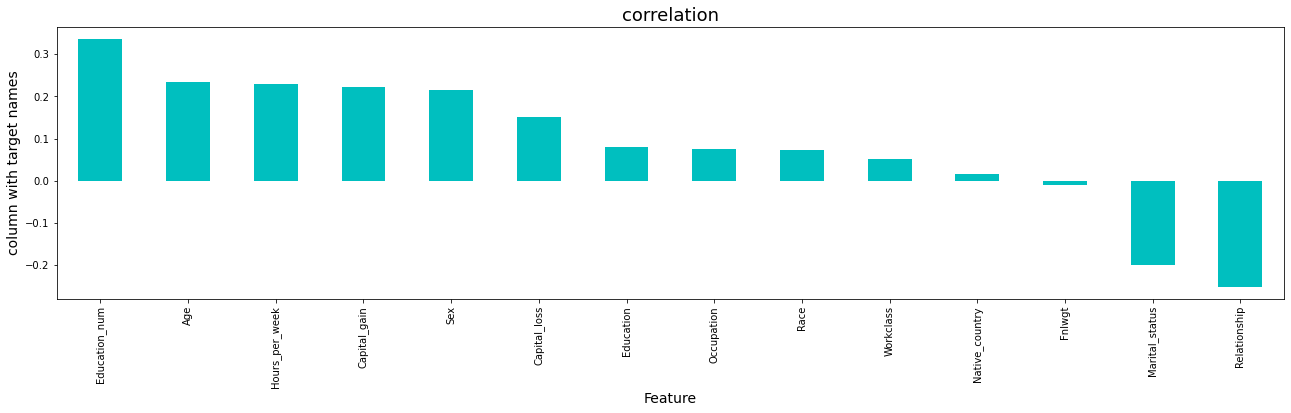

In [58]:
plt.figure(figsize=(22,5))
df.corr()['Income'].sort_values(ascending=False).drop(['Income']).plot(kind='bar', color="c")
plt.xlabel("Feature",fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

 Multicollinearity Check

<AxesSubplot:>

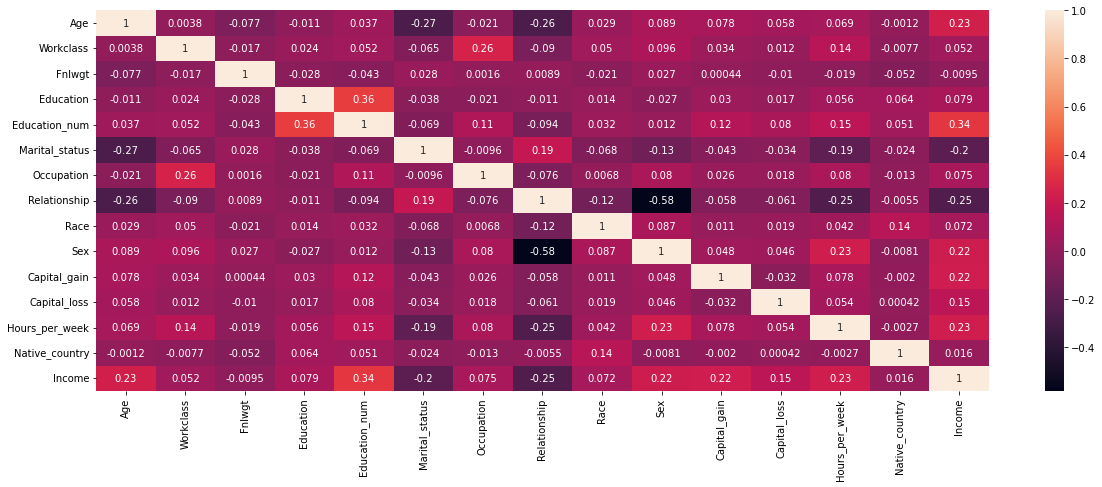

In [49]:
plt.figure(figsize=(20,7))
sns.heatmap(df.corr(), annot=True)

Observation: Most of teh columns donot seem to have a direct correaltion. Only Education & Education_num seem sto have a direct correlation.

In [59]:
df.corr()['Income'].sort_values()

Relationship     -0.250924
Marital_status   -0.199295
Fnlwgt           -0.009481
Native_country    0.015845
Workclass         0.051645
Race              0.071853
Occupation        0.075448
Education         0.079311
Capital_loss      0.150523
Sex               0.215995
Capital_gain      0.223333
Hours_per_week    0.229690
Age               0.234039
Education_num     0.335182
Income            1.000000
Name: Income, dtype: float64

Observations on Correlation(Collinearity & Multicollinearity)


From the above correlation statistics

Collinearity:
 - Education_num seem sto have a  34% positive correaltion to the target column which can be considered as a good bond
 - Relationship  has a negative correlation of 25% with the target column which can be considered as a weak bond
 - Age & Hours_per week have a 23% correlation with target.
 - Sex & Capital_gain has a 22% positive correltion with target
    
 - Feature with Maximum correlation = '34%'
 - Feature with Minimum correlation = '0.95%'
 

Multicollinearity:
 - From the heatmap we can see that the ALMOST ALL pairs of features DOES NOT have noticeable correllation between them 

But we will reconfrim this during further steps by finding the Variance Inflation Factor(VIF)


Outlier Check

Age                   AxesSubplot(0.125,0.71587;0.168478x0.16413)
Workclass          AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Fnlwgt             AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Education          AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Education_num        AxesSubplot(0.125,0.518913;0.168478x0.16413)
Marital_status    AxesSubplot(0.327174,0.518913;0.168478x0.16413)
Occupation        AxesSubplot(0.529348,0.518913;0.168478x0.16413)
Relationship      AxesSubplot(0.731522,0.518913;0.168478x0.16413)
Race                 AxesSubplot(0.125,0.321957;0.168478x0.16413)
Sex               AxesSubplot(0.327174,0.321957;0.168478x0.16413)
Capital_gain      AxesSubplot(0.529348,0.321957;0.168478x0.16413)
Capital_loss      AxesSubplot(0.731522,0.321957;0.168478x0.16413)
Hours_per_week          AxesSubplot(0.125,0.125;0.168478x0.16413)
Native_country       AxesSubplot(0.327174,0.125;0.168478x0.16413)
Income               AxesSubplot(0.529348,0.125;0.168478x0.16413)
dtype: obj

<Figure size 1080x648 with 0 Axes>

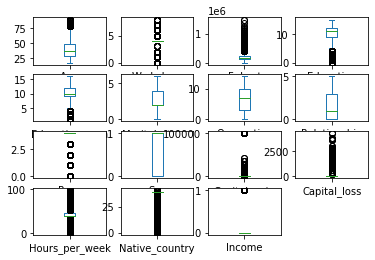

In [61]:
plt.figure(figsize=(15,9))

df.plot(kind='box',subplots= True, layout=(4,4))

From the above visualization plot its evident that many numerical feature posses outliers.

The outlier of the categorical data does not impact our model

The Target data does not impact our model

<AxesSubplot:xlabel='Age'>

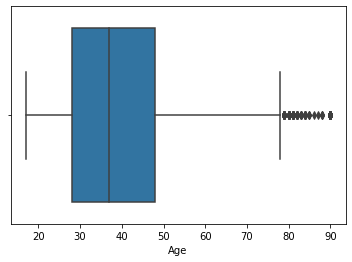

In [62]:
sns.boxplot(df['Age'])

<AxesSubplot:xlabel='Fnlwgt'>

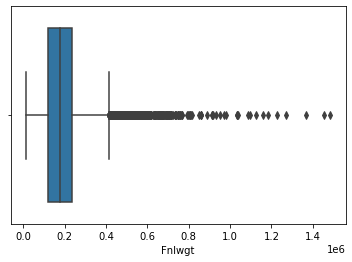

In [64]:
sns.boxplot(df['Fnlwgt'])

<AxesSubplot:xlabel='Education_num'>

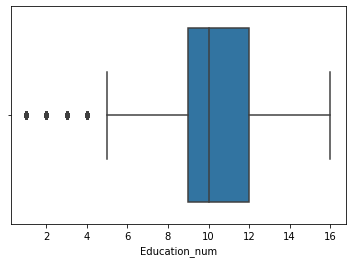

In [65]:
sns.boxplot(df['Education_num'])

<AxesSubplot:xlabel='Capital_gain'>

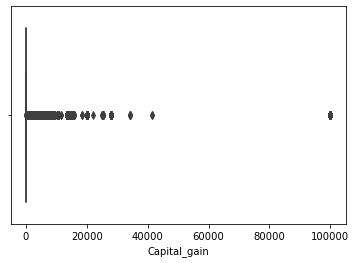

In [66]:
sns.boxplot(df['Capital_gain'])

<AxesSubplot:xlabel='Capital_loss'>

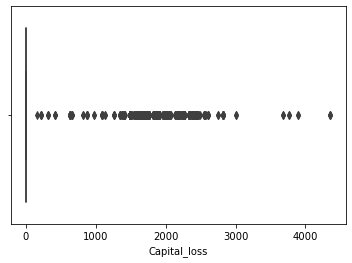

In [67]:
sns.boxplot(df['Capital_loss'])

<AxesSubplot:xlabel='Hours_per_week'>

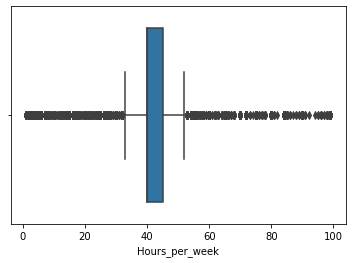

In [68]:
sns.boxplot(df['Hours_per_week'])

In [69]:
#Checking for skewness in each independent variable.
df.skew()

Age                0.558738
Workclass         -0.752280
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.114540
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -3.658235
Income             1.212383
dtype: float64

#Observations on Skewness Check:

Lets assume Skewness threshold is taken as +/-0.60.Meaning any value outside +/-0.60 contains skewness. Hence the below features are skewed:

- Fnlwgt   
- Education
- Relationship
- Race   
- Capital_gain   
- Capital_loss
- Native_country

DATA PREPROCESSING

 Removal of Duplicates and Unwanted Column

In [74]:
df.drop_duplicates(inplace =True)
df.shape

(32536, 15)

It appears there are no duplicates as there is no change in the number of rows.

Dropping of Features that strongly promotes multicollinearity(VIF)

The heatmap does not show any coorelation between 2 variables except Education & Education_num.

To solve this multicollinearity problem, we have to first scale our data using Standard Scaler

In [77]:
from sklearn.preprocessing import StandardScaler

In [111]:
ss=StandardScaler()

In [112]:
x=df.iloc[:,0:-1]
x.shape

(32536, 14)

In [113]:
y=df.iloc[:,-1]
y.nunique()

2

In [115]:
x_scaled=ss.fit_transform(x)
x_scaled

array([[ 0.83696128,  1.4635048 , -1.0087032 , ..., -0.21674666,
        -2.22244997,  0.29134033],
       [-0.04293421,  0.09020015,  0.24500772, ..., -0.21674666,
        -0.03566429,  0.29134033],
       [ 1.05693515,  0.09020015,  0.42571982, ..., -0.21674666,
        -0.03566429,  0.29134033],
       ...,
       [ 1.42355827,  0.09020015, -0.35881227, ..., -0.21674666,
        -0.03566429,  0.29134033],
       [-1.21612819,  0.09020015,  0.11089708, ..., -0.21674666,
        -1.65550554,  0.29134033],
       [ 0.98361053,  0.77685248,  0.92978106, ..., -0.21674666,
        -0.03566429,  0.29134033]])

In [116]:
x_scaled.shape

(32536, 14)

In [117]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [118]:
vif=pd.DataFrame()

In [119]:
vif['vif']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]

In [120]:
vif['Features']=x.columns
vif

,vif,Features
0,1.160357,Age
1,1.094052,Workclass
2,1.012304,Fnlwgt
3,1.159222,Education
4,1.218420,Education_num
5,1.127333,Marital_status
6,1.091924,Occupation
7,1.683259,Relationship
8,1.038286,Race
9,1.560046,Sex


#Let us check the zscore

In [121]:
import scipy.stats
from scipy.stats import zscore

In [122]:
z=zscore(df)
z

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,0.836961,1.463505,-1.008703,-0.335272,1.134817,-0.405890,-0.608366,-0.900122,0.393692,0.703036,-0.145969,-0.216747,-2.222450,0.291340,-0.563389
1,-0.042934,0.090200,0.245008,0.181506,-0.420646,-1.733664,-0.135486,-0.277868,0.393692,0.703036,-0.145969,-0.216747,-0.035664,0.291340,-0.563389
2,1.056935,0.090200,0.425720,-2.402383,-1.198377,-0.405890,-0.135486,-0.900122,-1.962450,0.703036,-0.145969,-0.216747,-0.035664,0.291340,-0.563389
3,-0.776180,0.090200,1.408036,-0.335272,1.134817,-0.405890,0.810273,2.211146,-1.962450,-1.422403,-0.145969,-0.216747,-0.035664,-4.056085,-0.563389
4,-0.116259,0.090200,0.898091,0.439895,1.523683,-0.405890,-0.608366,2.211146,0.393692,-1.422403,-0.145969,-0.216747,-0.035664,0.291340,-0.563389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,-0.849505,0.090200,0.639647,-0.852050,0.745951,-0.405890,1.519592,2.211146,0.393692,-1.422403,-0.145969,-0.216747,-0.197648,0.291340,-0.563389
32556,0.103715,0.090200,-0.335469,0.181506,-0.420646,-0.405890,0.100953,-0.900122,0.393692,0.703036,-0.145969,-0.216747,-0.035664,0.291340,1.774973
32557,1.423558,0.090200,-0.358812,0.181506,-0.420646,2.249657,-1.317685,1.588892,0.393692,-1.422403,-0.145969,-0.216747,-0.035664,0.291340,-0.563389
32558,-1.216128,0.090200,0.110897,0.181506,-0.420646,0.921884,-1.317685,0.966639,0.393692,0.703036,-0.145969,-0.216747,-1.655506,0.291340,-0.563389


In [123]:
#checking datashape of z
z.shape

(32536, 15)

In [124]:
threshold =3
np.where(z>3)
len(np.where(z>3)[0])

2500

In [125]:
#Extracting out the non-outliers(i.e zscore<3) and storing output in new object
df_new=df[(z<3).all(axis=1)]

#old Dataset
print("Old DataFrame",df.shape)
#Dataset after removal of outliers
print("New DataFrame",df_new.shape)#Data without outliers
# total rows deleted
print("total_dropped_rows",df.shape[0]-df_new.shape[0])

Old DataFrame (32536, 15)
New DataFrame (30084, 15)
total_dropped_rows 2452


In [126]:
#% loss of data

2452/32536*100

7.536267519055816

We will go ahead with removal of data as its approx 7.5% 

In [129]:
#reconfirming that mean is 0
round(x_scaled.mean(),2)



-0.0

In [130]:
round(x_scaled.std(),2)

1.0

As this data set is an imbalanced dataset we will use the SMOTE technique to balacne it

In [72]:
df.Income.value_counts()

0.0    24719
1.0     7841
Name: Income, dtype: int64

In [131]:
from imblearn.over_sampling import SMOTE

In [133]:
smt=SMOTE()

In [134]:
#x,y are the inputs inside smote to create artificial rows
#trainx & trainy are givng the new rows
trainx,trainy=smt.fit_resample(x,y)

In [136]:
trainy.value_counts()

0.0    24697
1.0    24697
Name: Income, dtype: int64

Model-Linear Regression because y Target is binary

In [148]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [149]:
lr=LogisticRegression()

In [150]:
x_train,x_test,y_train,y_test=train_test_split(trainx,trainy,test_size=.20)


In [151]:
lr.fit(x_train,y_train)


LogisticRegression()

In [158]:
lr.score(x_train,y_train)


0.6224218651145135

In [159]:
pred_test=lr.predict(x_test)

In [160]:
pred_test

array([0., 0., 0., ..., 1., 1., 0.])

In [167]:
lr_acc=round(accuracy_score(y_test,pred_test),2)
lr_acc

0.63

In [162]:
confusion_matrix(y_test,pred_test)

array([[3166, 1806],
       [1824, 3083]], dtype=int64)

In [163]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

         0.0       0.63      0.64      0.64      4972
         1.0       0.63      0.63      0.63      4907

    accuracy                           0.63      9879
   macro avg       0.63      0.63      0.63      9879
weighted avg       0.63      0.63      0.63      9879



Checking overfitting or underfitting of Linear Regression model

In [164]:
from sklearn.model_selection import cross_val_score

In [168]:
scr=cross_val_score(lr,x,y,cv=5)
print(scr)
lrcv_scr=round(scr.mean(),2)
print(round(scr.std()),2)
print("The cv score for Linear Regression:",lrcv_scr)

[0.78733866 0.78576917 0.78761334 0.78561549 0.79237744]
0 2
The cv score for Linear Regression: 0.79


Decision Tree Classifier

In [170]:
from sklearn.tree import DecisionTreeClassifier

In [171]:
dtc=DecisionTreeClassifier()

In [172]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [173]:
pred=dtc.predict(x_test)
pred

array([0., 0., 1., ..., 0., 1., 0.])

In [174]:
acc_dtc=round(accuracy_score(y_test,pred),2)
acc_dtc

0.86

In [175]:
confusion_matrix(y_test,pred)

array([[4217,  755],
       [ 625, 4282]], dtype=int64)

<AxesSubplot:>

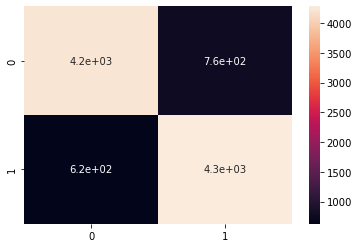

In [176]:
cf=confusion_matrix(y_test,pred)
sns.heatmap(cf,annot=True)

In [177]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.87      0.85      0.86      4972
         1.0       0.85      0.87      0.86      4907

    accuracy                           0.86      9879
   macro avg       0.86      0.86      0.86      9879
weighted avg       0.86      0.86      0.86      9879



Cross Validation of Decision Tree Classifier

In [178]:
dtc_scr=cross_val_score(dtc,x,y,cv=5)
print(dtc_scr)
dtc_cv_scr=round(dtc_scr.mean(),2)
print(round(dtc_scr.std()),2)
print("The cv score for Decision Tree:",dtc_cv_scr)

[0.80654579 0.80421085 0.8069771  0.81404641 0.80421085]
0 2
The cv score for Decision Tree: 0.81


Random Forest

In [180]:
from sklearn.ensemble import RandomForestClassifier

In [182]:
rf=RandomForestClassifier()

In [183]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [184]:
pred=rf.predict(x_test)
pred


array([0., 0., 1., ..., 0., 1., 0.])

In [185]:
acc_rf=round(accuracy_score(y_test,pred),2)
acc_rf

0.9

In [186]:
confusion_matrix(y_test,pred)
cf=confusion_matrix(y_test,pred)
cf

array([[4527,  445],
       [ 533, 4374]], dtype=int64)

              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90      4972
         1.0       0.91      0.89      0.90      4907

    accuracy                           0.90      9879
   macro avg       0.90      0.90      0.90      9879
weighted avg       0.90      0.90      0.90      9879



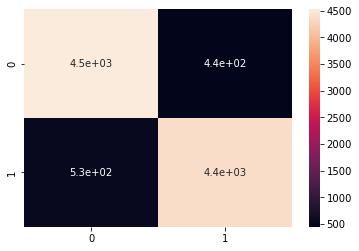

In [187]:
sns.heatmap(cf,annot=True)
print(classification_report(y_test,pred))

Cross validation of Random Forest

In [188]:
rf_scr=cross_val_score(rf,x,y,cv=5)
print(rf_scr)
rf_cv_scr=round(rf_scr.mean(),2)
print(round(rf_scr.std()),2)
print("The cv score for Random Forest:",rf_cv_scr)

[0.85433313 0.85446442 0.85538651 0.86030429 0.85953588]
0 2
The cv score for Random Forest: 0.86


SVC

In [190]:
from sklearn.svm import SVC

In [191]:
svc=SVC()

In [192]:
svc.fit(x_train,y_train)

SVC()

In [193]:
pred=svc.predict(x_test)
pred

array([0., 0., 0., ..., 0., 0., 0.])

In [194]:
acc_svc=round(accuracy_score(y_test,pred),2)
acc_svc

0.6

In [195]:
confusion_matrix(y_test,pred)
cf=confusion_matrix(y_test,pred)
cf

array([[4923,   49],
       [3918,  989]], dtype=int64)

              precision    recall  f1-score   support

         0.0       0.56      0.99      0.71      4972
         1.0       0.95      0.20      0.33      4907

    accuracy                           0.60      9879
   macro avg       0.75      0.60      0.52      9879
weighted avg       0.75      0.60      0.52      9879



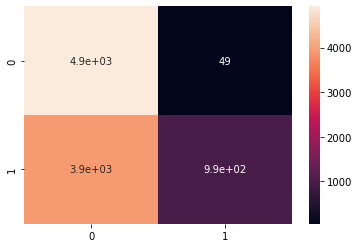

In [196]:
sns.heatmap(cf,annot=True)
print(classification_report(y_test,pred))

Cross validation of SVC

In [197]:
svc_scr=cross_val_score(svc,x,y,cv=5)
print(svc_scr)
svc_cv_scr=round(svc_scr.mean(),2)
print(round(svc_scr.std()),2)
print("The cv score for SVC:",svc_cv_scr)

[0.79563614 0.79422161 0.79499001 0.7966805  0.79406793]
0 2
The cv score for SVC: 0.8


Gaussian Naive Bayes

In [199]:
from sklearn.naive_bayes import GaussianNB

In [200]:
gb=GaussianNB()

In [201]:
gb.fit(x_train,y_train)

GaussianNB()

In [202]:
pred=gb.predict(x_test)
pred

array([0., 0., 0., ..., 0., 0., 0.])

In [203]:
acc_gb=round(accuracy_score(y_test,pred),2)
acc_gb

0.63

In [204]:
confusion_matrix(y_test,pred)
cf=confusion_matrix(y_test,pred)
cf

array([[4710,  262],
       [3404, 1503]], dtype=int64)

              precision    recall  f1-score   support

         0.0       0.58      0.95      0.72      4972
         1.0       0.85      0.31      0.45      4907

    accuracy                           0.63      9879
   macro avg       0.72      0.63      0.59      9879
weighted avg       0.72      0.63      0.59      9879



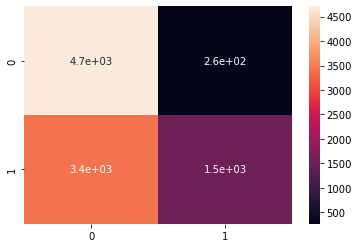

In [205]:
sns.heatmap(cf,annot=True)
print(classification_report(y_test,pred))

Cross validation of Gaussian Naive Bayes

In [206]:
gb_scr=cross_val_score(gb,x,y,cv=5)
print(gb_scr)
gb_cv_scr=round(gb_scr.mean(),2)
print(round(gb_scr.std()),2)
print("The cv score for Gaussian Naive Bayes:",gb_cv_scr)

[0.79394591 0.79160904 0.79883203 0.79114799 0.80052251]
0 2
The cv score for Gaussian Naive Bayes: 0.8


In [207]:
#constructing a dataframe of the models used

Models=pd.DataFrame({'Ml_Models':['Logistic Regression','Decision Tree Classifier','Random Forest Classifier','SVC',' Gaussian Naive Bayes'], 'Accuracy_Score':[lr_acc,acc_dtc,acc_rf,acc_svc,acc_gb], 'Cross_Validation_Score':[lrcv_scr,dtc_cv_scr,rf_cv_scr,svc_cv_scr,gb_cv_scr]})
Models

,Ml_Models,Accuracy_Score,Cross_Validation_Score
0,Logistic Regression,0.63,0.79
1,Decision Tree Classifier,0.86,0.81
2,Random Forest Classifier,0.90,0.86
3,SVC,0.60,0.80
4,Gaussian Naive Bayes,0.63,0.80


We will be taking Random Forest classifier as the best model as the accuracy score & Cross validation score is the maximum for this model.

Hyper Parameter tunning

In [211]:
from sklearn.model_selection import GridSearchCV

In [212]:
rf=RandomForestClassifier()

In [213]:
parameters={'max_features':['auto','sqrt','log2'],
           'max_depth':[4,5,6,7,8],
            'criterion' :['gini', 'entropy'],
            'n_estimators':[100,200,300,400,500]}

In [214]:
GSV=GridSearchCV(rf,parameters,cv=5)

In [215]:
GSV.fit(x_train,y_train)
GSV.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 100}

In [216]:
GSV.best_estimator_

RandomForestClassifier(max_depth=8)

In [217]:
GCV_pred=GSV.best_estimator_.predict(x_test)#predicting with the best parameter
accuracy_score(y_test,GCV_pred)#checking final accuracy

0.8775179674056078

ROC AUC plot

In [219]:
from sklearn.metrics import plot_roc_curve

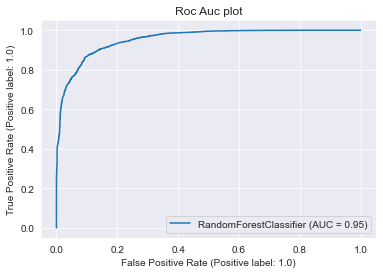

In [220]:
plot_roc_curve(GSV.best_estimator_,x_test,y_test)
plt.title("Roc Auc plot")
plt.show()

Model Saving

In [223]:
import pickle

In [224]:
filename='ML_Census_Income'
pickle.dump(rf,open(filename,'wb'))